In [3]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from ydata_profiling import ProfileReport
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
url = 'https://raw.githubusercontent.com/Nzavo/Clustering/main/Pakistan%20Largest%20Ecommerce%20Data.csv'

In [5]:
df = pd.read_csv(url,parse_dates = ["created_at","Customer Since", "M-Y"])
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,cod,07-01-16,#REF!,"1,950",2016,7,2016-07-01,Jul-16,FY17,1.0
1,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,...,cod,07-01-16,Gross,240,2016,7,2016-07-01,Jul-16,FY17,2.0
2,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,...,cod,07-01-16,Gross,"2,450",2016,7,2016-07-01,Jul-16,FY17,3.0
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,07-01-16,Net,360,2016,7,2016-07-01,Jul-16,FY17,4.0
4,211136,order_refunded,2016-07-01,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,...,cod,07-01-16,Valid,"1,110",2016,7,2016-07-01,Jul-16,FY17,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  int64         
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  int64         
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  obje

#### Dropping some columns - increment_id, sales_commission_code, Working Date, Year, Month,  FY

In [7]:
columns = ['increment_id', 'sales_commission_code', 'Working Date', 'Year', 'Month', 'M-Y', 'FY']

In [8]:
df.drop(columns, axis=1, inplace=True)

In [9]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,BI Status,MV,Customer Since,Customer ID
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,Women's Fashion,0.0,cod,#REF!,"1,950",2016-07-01,1.0
1,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,Beauty & Grooming,0.0,cod,Gross,240,2016-07-01,2.0
2,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1,2450.0,Women's Fashion,0.0,cod,Gross,"2,450",2016-07-01,3.0
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1,60.0,Beauty & Grooming,300.0,cod,Net,360,2016-07-01,4.0
4,211136,order_refunded,2016-07-01,BK7010400AG,555.0,2,1110.0,Soghaat,0.0,cod,Valid,"1,110",2016-07-01,5.0


#### Checking for missing data

In [10]:
df.isnull().sum()

item_id              0
status              15
created_at           0
sku                 20
price                0
qty_ordered          0
grand_total          0
category_name_1    164
discount_amount      0
payment_method       0
BI Status            0
 MV                  0
Customer Since      11
Customer ID         11
dtype: int64

#### Dropping of missing values in rows

In [11]:
df.dropna(axis=0, how='any', inplace=True)

In [12]:
df.isnull().sum()

item_id            0
status             0
created_at         0
sku                0
price              0
qty_ordered        0
grand_total        0
category_name_1    0
discount_amount    0
payment_method     0
BI Status          0
 MV                0
Customer Since     0
Customer ID        0
dtype: int64

Generate two columns; 'Year' and 'Month', from 'created_at' column

In [13]:
df['Year'] = df['created_at'].dt.year
df['Month'] = df['created_at'].dt.month

Merge the 'Year' and 'Month' column to generate a column 'M-Y'

In [14]:
df['M-Y'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01', format='%Y-%m-%d')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584314 entries, 0 to 584523
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584314 non-null  int64         
 1   status           584314 non-null  object        
 2   created_at       584314 non-null  datetime64[ns]
 3   sku              584314 non-null  object        
 4   price            584314 non-null  float64       
 5   qty_ordered      584314 non-null  int64         
 6   grand_total      584314 non-null  float64       
 7   category_name_1  584314 non-null  object        
 8   discount_amount  584314 non-null  float64       
 9   payment_method   584314 non-null  object        
 10  BI Status        584314 non-null  object        
 11   MV              584314 non-null  object        
 12  Customer Since   584314 non-null  datetime64[ns]
 13  Customer ID      584314 non-null  float64       
 14  Year             584

#### Pandas Profile Report

In [16]:
#uncomment the following lines of code in order to generate the pandas profile report
# profile = ProfileReport(df)
# profile.to_file('Report.html')

#### Product with the highest Price

In [17]:
sorted_df = df.sort_values(by='price', ascending=False)

# Retrieve the first row (product with the highest price)
product_with_highest_price = sorted_df.iloc[0]
selected_columns = ['Customer ID', 'category_name_1', 'sku', 'price']
row = pd.DataFrame([product_with_highest_price[selected_columns].values], columns=selected_columns)
row

,Customer ID,category_name_1,sku,price
0,17987.0,Beauty & Grooming,BAGGEM5A7038AC06C9A,1012625.9


Product with the highest price falls on the Beauty & Grooming category and had the price of 1012625.9

#### Plot For Top 10 Best Performing Products Yearly

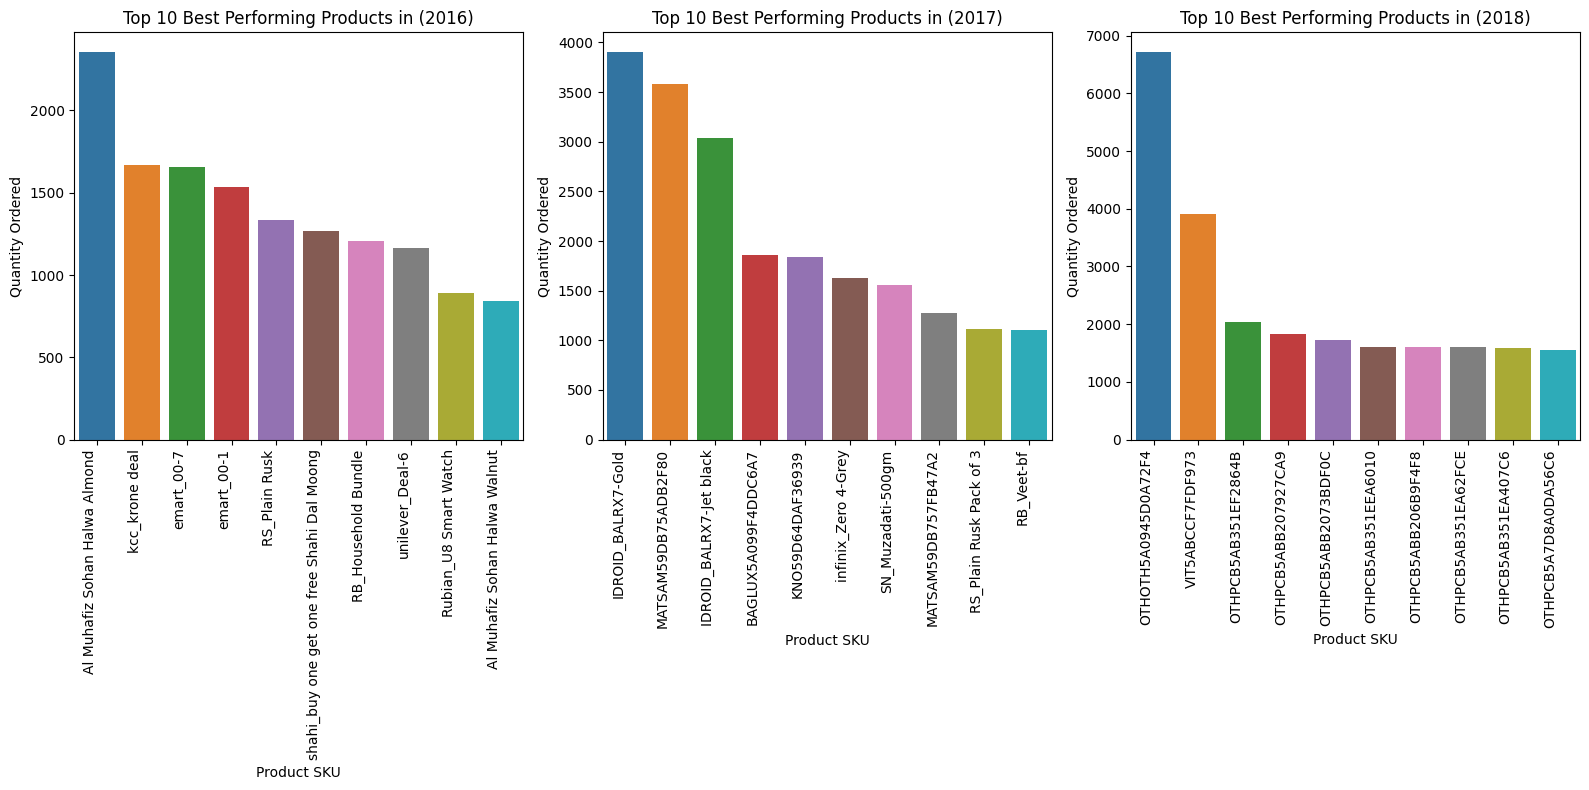

In [18]:
# Group the data by year and product reference name, and sum the 'qty_ordered'
grouped_data = df.groupby(['Year', 'sku'])['qty_ordered'].sum().reset_index()

# Iterate over the unique years and plot a bar chart for each year
unique_years = grouped_data['Year'].unique()
fig, axes = plt.subplots(1, len(unique_years), sharey = False, figsize=(16, 8))

for i, year in enumerate(unique_years):
    # Filter data for the specific year
    ax = axes[i]
    data_year = grouped_data[grouped_data['Year'] == year]

    # Sort the data by quantity ordered and select the top 10 products
    data_year = data_year.sort_values('qty_ordered', ascending=False).head(10)

    # Plot the bar chart on the corresponding axis
    sns.barplot(x='sku', y='qty_ordered', data=data_year, ax=ax)
    ax.set_title(f'Top 10 Best Performing Products in ({year})')
    ax.set_xlabel('Product SKU')
    ax.set_ylabel('Quantity Ordered')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.tight_layout()
plt.show()



### Best Selling Categories

In [19]:
#check for the number of categories
category = df['category_name_1'].nunique()
category

16

In [20]:
#Group the data by 'Year' and 'category_name_1', and sum the 'qty_ordered'
grouped_data = df.groupby(['Year', 'category_name_1'])['qty_ordered'].sum().reset_index()

# Find the best-selling category for each 'Year'
best_selling_categories = grouped_data.groupby('Year').apply(lambda x: x[x['qty_ordered'] == x['qty_ordered'].max()]).reset_index(drop=True)
best_selling_categories

,Year,category_name_1,qty_ordered
0,2016,Men's Fashion,27306
1,2017,Mobiles & Tablets,71346
2,2018,Others,76957


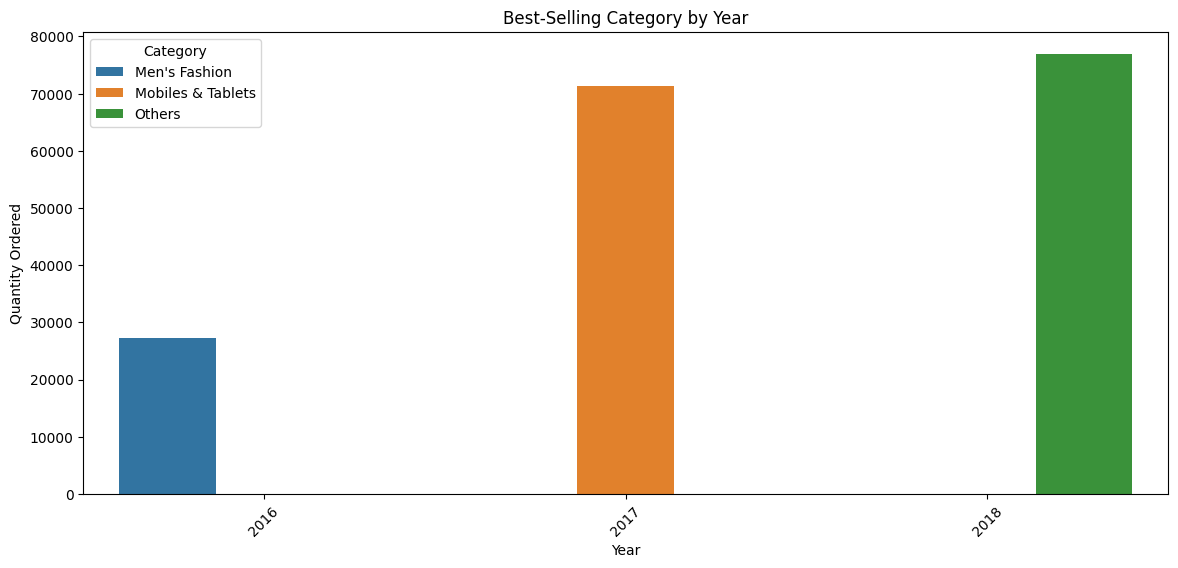

In [21]:
plt.figure(figsize=(14, 6))
sns.barplot(data=best_selling_categories, x='Year', y='qty_ordered', hue='category_name_1')

plt.title('Best-Selling Category by Year')
plt.xlabel('Year')
plt.ylabel('Quantity Ordered')

plt.xticks(rotation=45)
plt.legend(title='Category', loc='upper left')
plt.show()


#### Plot For Top 10 Best Selling Categories Per Year

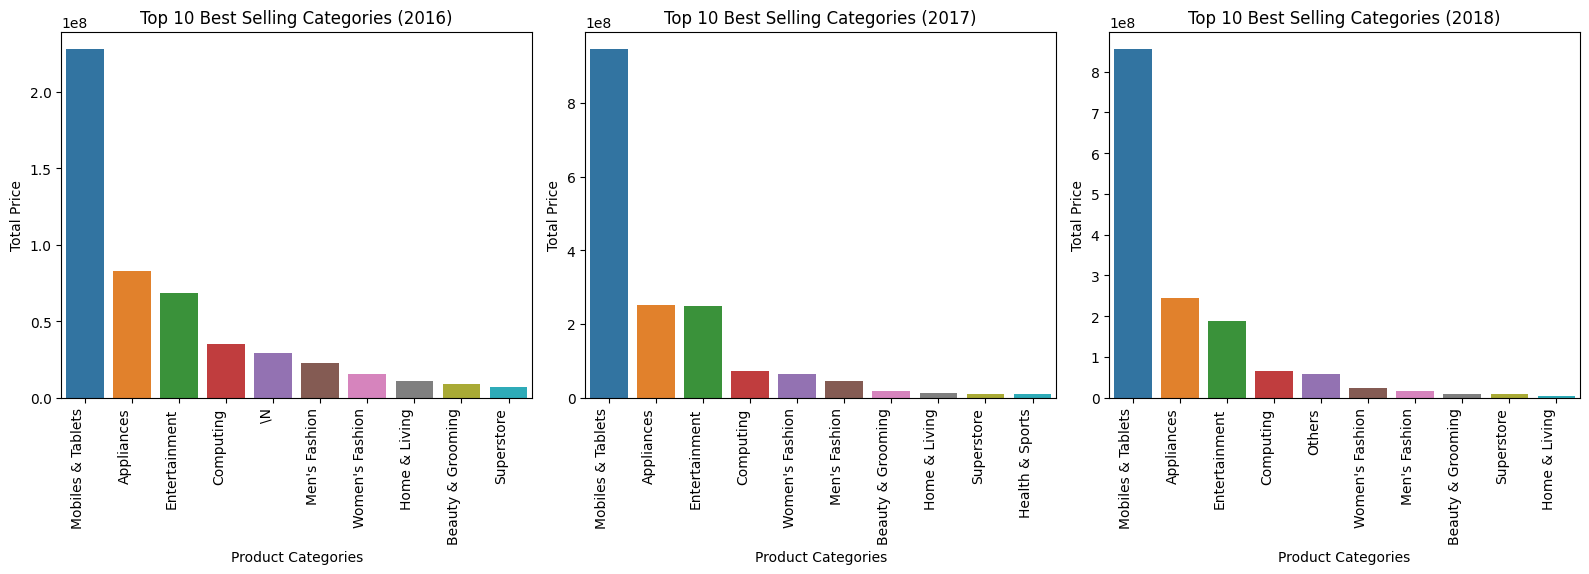

In [22]:
years = df['Year'].unique()
fig, axes = plt.subplots(1, len(years), sharey = False, figsize=(16, 6))

# Loop through each year and create a bar plot for the top 10 categories
for i, year in enumerate(years):
    ax = axes[i]
    year_df = df[df['Year'] == year]

    # Group by 'category_name_1' and calculate the sum of prices for each category
    category_sum = year_df.groupby('category_name_1')['price'].sum().reset_index()

    # Sort the categories by the sum of prices in descending order
    category_sum_sorted = category_sum.sort_values(by='price', ascending=False)

    # Select the top 10 categories
    top_10 = category_sum_sorted.head(10)

    # Create a bar plot for the top 10 categories
    #sns.barplot(x='category_name_1', y='price', data=category_sum_sorted, ax=ax)
    sns.barplot(x='category_name_1', y='price', data=top_10, ax=ax)
    ax.set_title(f'Top 10 Best Selling Categories ({year})')
    ax.set(xlabel='Product Categories', ylabel='Total Price')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.tight_layout()
plt.show()


From the above plot, we can see that Mobile & Tablets Category had the highest sales throughout the years. This can indicate that this is the most sort after category considered for the online shopping.

### Correlation Heatmap to showcase the payment method vs status

In [23]:
payment_vs_status = pd.crosstab(df.payment_method, df.status)
payment_vs_status

status,\N,canceled,closed,cod,complete,exchange,fraud,holded,order_refunded,paid,payment_review,pending,pending_paypal,processing,received,refund
payment_method,,,,,,,,,,,,,,,,
Easypay,0,52034,16,0,19214,0,0,2,2621,241,0,0,0,0,8036,729
Easypay_MA,0,9209,0,0,3116,0,0,0,314,35,0,0,0,0,1208,144
Payaxis,0,61267,71,0,22809,0,9,8,3813,398,0,0,0,4,8708,553
apg,0,1361,0,0,27,0,0,0,42,20,0,0,0,0,305,3
bankalfalah,0,16179,5,0,586,0,0,15,745,183,57,0,0,8,5165,114
cashatdoorstep,0,5,0,0,674,0,0,0,30,0,0,0,0,0,5,18
cod,4,21644,360,2854,148038,4,0,6,48744,0,0,0,7,20,44551,5538
customercredit,0,47,24,0,4151,0,0,0,1268,98,0,3,0,0,1740,223
easypay_voucher,0,12188,2,0,16066,0,0,0,480,18,0,33,0,0,2147,241


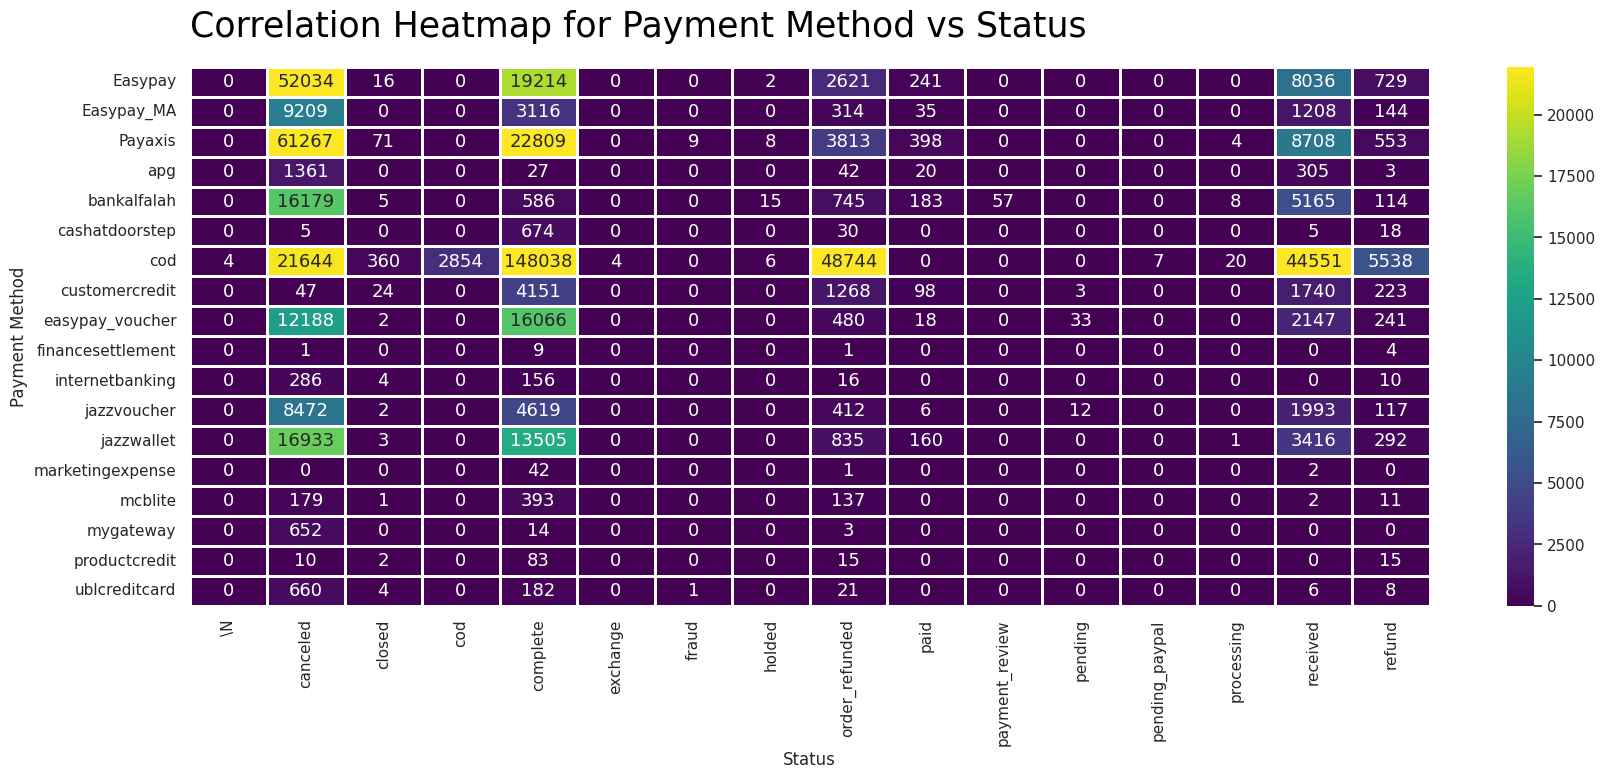

In [24]:
plt.figure(figsize = (20, 7))
sns.set_theme(context = 'notebook', style = 'darkgrid', palette = 'bright', font = 'sans-serif', font_scale = 1, color_codes = True, rc = None)

sns.heatmap(payment_vs_status,
            cmap = 'viridis',
            robust = True,
            annot = True,
            annot_kws = {'size':13},
            fmt = ".0f",
            linecolor = 'white',
            linewidths = 1,
            cbar = True,
            square = False,
            xticklabels = True,
            yticklabels = True)

plt.xlabel("Status")
plt.ylabel("Payment Method")
plt.text(0,-1, "Correlation Heatmap for Payment Method vs Status", fontsize = 25, color = 'Black')
plt.show()

The payment method Payaxis and Easypay had the most number of cancelled orders. The cod (cash on delivery) payment method had the highest number of completed orders and also the highest number of orders refunded.

#### Plot to show the Count of Cancelled Items Per Category Yearly

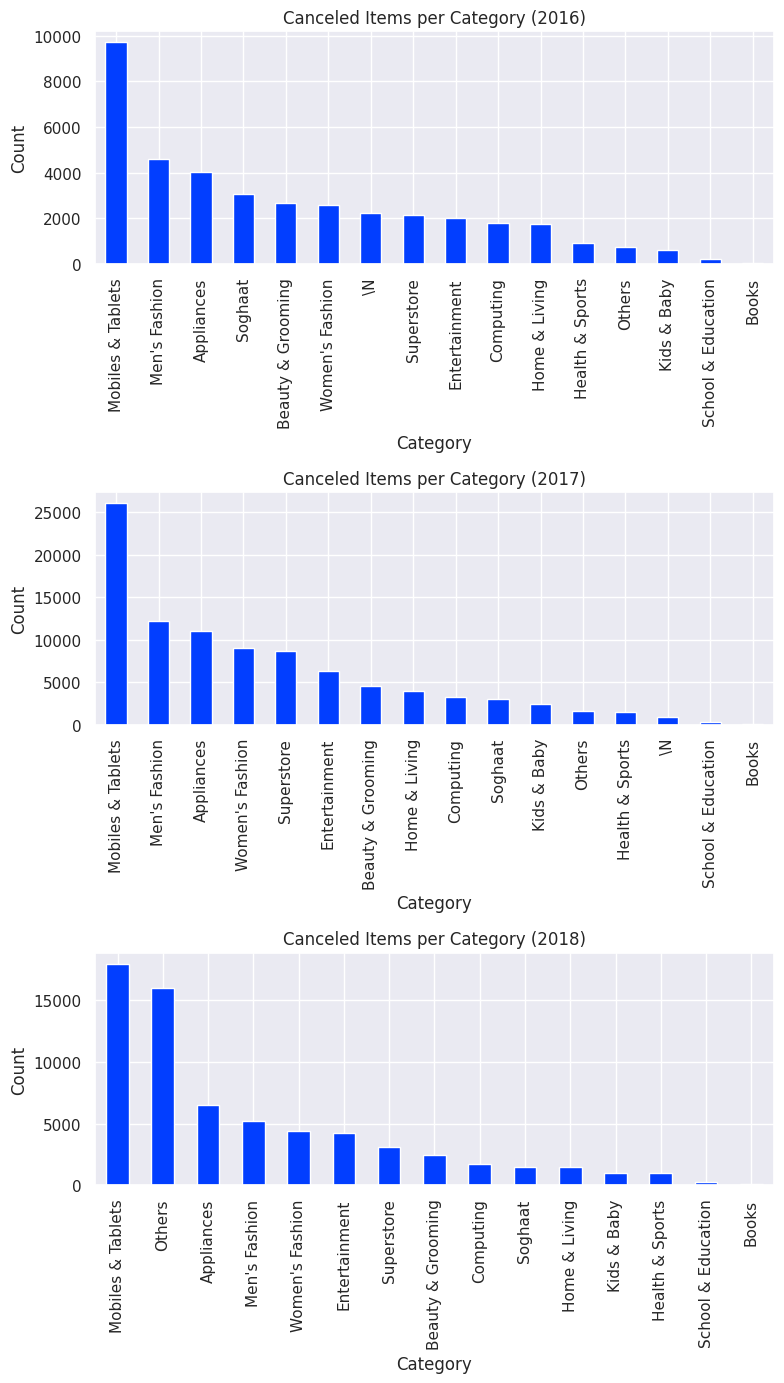

In [25]:
# Filter the DataFrame for each year
years = df['Year'].unique()
#fig, axes = plt.subplots(1, len(years), sharey = False, figsize=(16, 6))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 14))

# Loop through each year and create a bar plot for canceled items
for i, year in enumerate(years):
    ax = axes[i]
    year_df = df[(df['Year'] == year) & (df['status'] == 'canceled')]  # Filter for canceled items only

    # Count the canceled items per category
    canceled_counts = year_df['category_name_1'].value_counts().sort_values(ascending=False)
    canceled_counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.set_title(f'Canceled Items per Category ({year})')

plt.tight_layout()
plt.show()


Despite the fact that the Mobile & Tablets Category was the best performing category throughout the three years, it also had the highest number of cancelled items compared to other categories.

Books on the other hand had the least count of cancelled orders of less than 2000.

#### Plot For The Payment Method Yearly

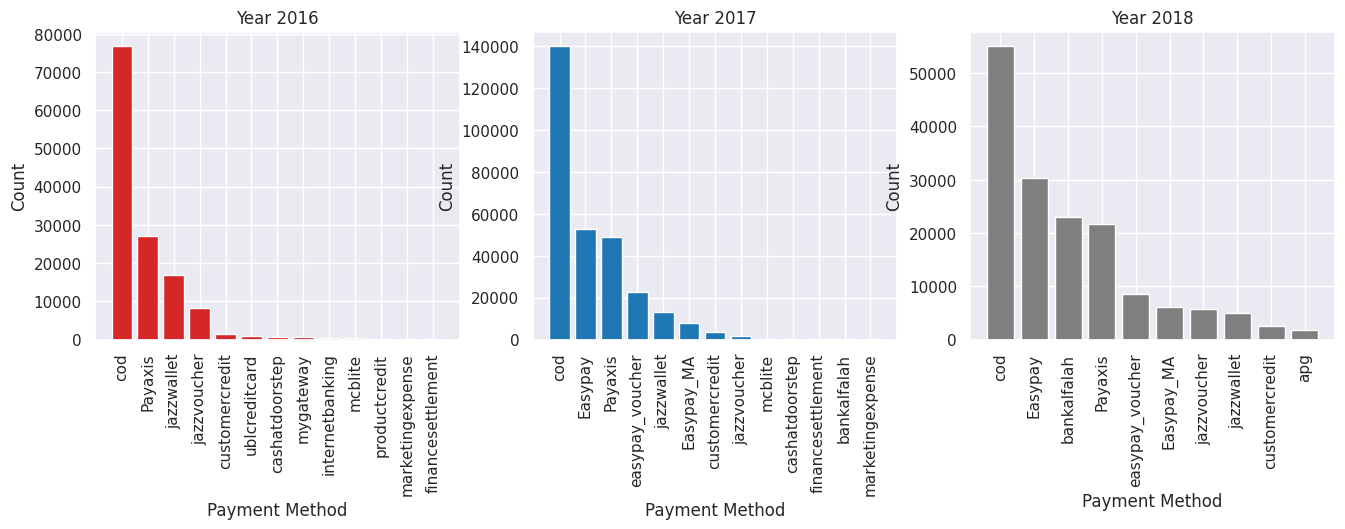

In [26]:
payment_methods = pd.DataFrame(df[['payment_method', 'Year']].value_counts())
payment_methods = payment_methods.reset_index()
payment_methods.columns = ['Payment Methods', 'Year', 'Count']
years = payment_methods.Year.unique()
years = sorted(years)

mycolors = ['tab:red', 'tab:blue', 'tab:grey']

fig, ax = plt.subplots(1, len(years), sharey = False, figsize = (16, 4))

for i, j in enumerate(years):

    data = payment_methods[payment_methods['Year'] == j].value_counts().reset_index().sort_values(by = ['Count'], ascending = False)

    ax[i].bar(data['Payment Methods'], data.Count, color = mycolors[i])

    #labels
    ax[i].set(xlabel = 'Payment Method')
    ax[i].set(ylabel = 'Count')
    ax[i].set(title = 'Year ' + str(j))
    ax[i].tick_params(labelrotation = 90, axis='x')

In 2016, the most preferred payment method was cod with a count of more than 70000, followed by Payaxis. In 2017, still cod was the most preferred payment method and had the highest count of over 120000. In 2018, there was a signifacant drop thus fewer transactions but still cod leading.

The cod (cash on delivery) is the most preferred payment method across the three years.

#### Feature Engineering

In [27]:
# select columns with numerical data types
num_col = df.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = df[num_col]
subset.head()

,item_id,price,qty_ordered,grand_total,discount_amount,Customer ID,Year,Month
0,211131,1950.0,1,1950.0,0.0,1.0,2016,7
1,211133,240.0,1,240.0,0.0,2.0,2016,7
2,211134,2450.0,1,2450.0,0.0,3.0,2016,7
3,211135,360.0,1,60.0,300.0,4.0,2016,7
4,211136,555.0,2,1110.0,0.0,5.0,2016,7


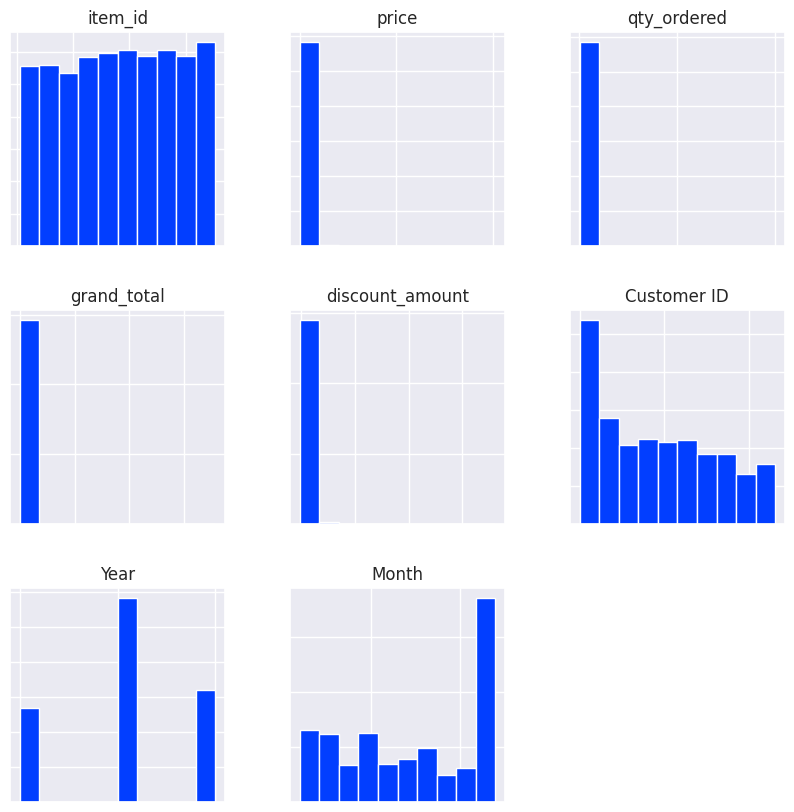

In [28]:
# create a histogram plot of each numeric variable
ax = subset.hist(figsize=(10, 10))
# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
# show the plot
plt.show()

From the above plot, we can see that the numerical columns do not follow a gaussian like distribution so we will normalize using MinMaxScaler to scale our data between 0 and 1

Aggregating the data per customer

In [29]:
df.drop(['created_at', 'Customer Since', 'M-Y', 'item_id', 'BI Status', ' MV '], axis=1, inplace=True)

aggregation_functions = {
#     'item_id': 'sum',
#     'price': 'sum',
#     'qty_ordered': 'sum',
#     'grand_total': 'sum',
#     'discount_amount': 'sum',
#     'Year': 'first',
#     'Month': 'first',
#     'status': lambda x: x.mode().iloc[0],
#     'sku': lambda x: x.mode().iloc[0],
#     'category_name_1': lambda x: x.mode().iloc[0],
#     'payment_method': lambda x: x.mode().iloc[0],
#     'BI Status': lambda x: x.mode().iloc[0],
#     ' MV ': lambda x: x.mode().iloc[0],
    'status': 'first',
    'sku': 'first',
    'price': 'sum',
    'qty_ordered': 'sum',
    'grand_total': 'sum',
    'category_name_1': 'first',
    'discount_amount': 'sum',
    'payment_method': 'first',
    'Year': 'first',
    'Month': 'first'
}

df_grouped = df.groupby('Customer ID').agg(aggregation_functions).reset_index()

In [30]:
df_grouped.head()

,Customer ID,status,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month
0,1.0,complete,kreations_YI 06-L,1950.0,1,1950.00,Women's Fashion,0.00,cod,2016,7
1,2.0,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,510.0,2,510.00,Beauty & Grooming,0.00,cod,2016,7
2,3.0,canceled,Ego_UP0017-999-MR0,3695.0,5,7430.00,Women's Fashion,0.00,cod,2016,7
3,4.0,complete,kcc_krone deal,2702416.5,494,2567596.45,Beauty & Grooming,248547.05,cod,2016,7
4,5.0,order_refunded,BK7010400AG,555.0,2,1110.00,Soghaat,0.00,cod,2016,7


In [31]:
#select specific columns for modelling
df_selected = df_grouped[['category_name_1', 'status', 'qty_ordered', 'grand_total','discount_amount', 'payment_method', 'Year','Month']]
df_selected.head()

,category_name_1,status,qty_ordered,grand_total,discount_amount,payment_method,Year,Month
0,Women's Fashion,complete,1,1950.00,0.00,cod,2016,7
1,Beauty & Grooming,canceled,2,510.00,0.00,cod,2016,7
2,Women's Fashion,canceled,5,7430.00,0.00,cod,2016,7
3,Beauty & Grooming,complete,494,2567596.45,248547.05,cod,2016,7
4,Soghaat,order_refunded,2,1110.00,0.00,cod,2016,7


In [32]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# Define the categorical columns
cat_col = ['category_name_1', 'status', 'payment_method']

# Define the numerical columns
num_col = ['qty_ordered', 'grand_total', 'discount_amount','Year', 'Month']

# Create column transformer for numerical columns only
ct_num = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_col)
])

# Fit and transform the numerical columns
transformed_num_data = ct_num.fit_transform(df_selected[num_col])

# Apply LabelBinarizer for each categorical column
transformed_cat_data = pd.concat([pd.DataFrame(LabelBinarizer().fit_transform(df_selected[col]), columns=[col + '_' + str(cls) for cls in df_selected[col].unique()]) for col in cat_col], axis=1)

# Concatenate transformed numerical and categorical data
transformed_data = np.concatenate((transformed_num_data, transformed_cat_data), axis=1)


In [33]:
transformed_data

array([[0.00000000e+00, 2.70268848e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.43842965e-04, 7.06856987e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.75371861e-04, 1.02979361e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 7.60910757e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.43842965e-04, 1.66180692e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.97558019e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

#### Clustering Models

We will use three different algorithm to perform clustering.This are:

* KMeans clustering - divides the dataset into 'k' clusters, where 'k' is a user-defined parameter representing the number of clusters

* Hierarchical clustering - builds a tree of clusters, known as dendogram. It does not require number of clusters to be specified in advance
* DBSCAN clustering - Density Based Spatial Clustering of Applications with Noise, groups together data points that are close to each other based on distance metric

##### Clustering using KMeans

Silhouette Score:  0.19670175520724406


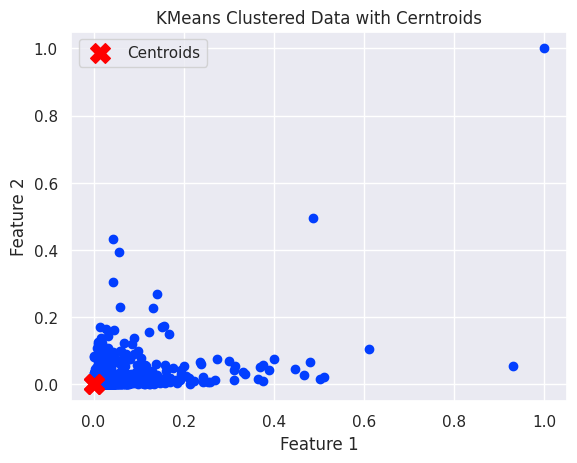

In [34]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# #initialize the KMeans clustering algorithm
# kmeans = KMeans(n_clusters=3, random_state=42)

# #fit the model to the data
# kmeans.fit(transformed_data)

# #predict the cluster for each data point
# labels = kmeans.labels_

# #calculate silhouette score
# silhouette_avg = silhouette_score(transformed_data, labels)
# print("Silhouette Score: ", silhouette_avg)

# #visualize the clusters
# plt.scatter(transformed_data[:, 0], transformed_data[:, 1], cmap = 'viridis')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('KMeans Clustered Data with Cerntroids')
# plt.legend()
# plt.show()

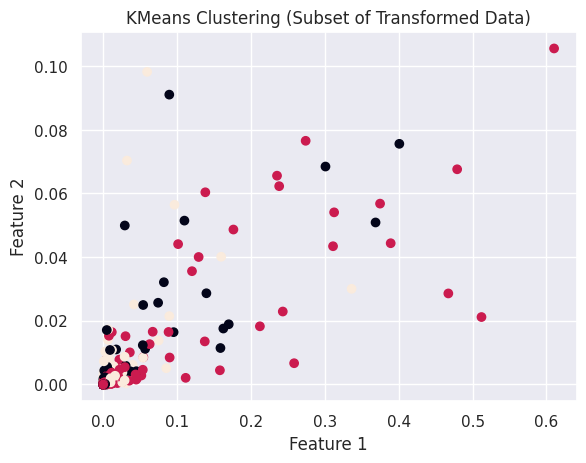

In [44]:
from sklearn.cluster import KMeans
subset_size = 1000  # Choose the size of the subset
subset_data = transformed_data[:subset_size]

# Perform KMeans clustering on the subset
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(subset_data)

# Scatter plot the clustered subset data
plt.scatter(subset_data[:, 0], subset_data[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering (Subset of Transformed Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

###### Clustering using DBSCAN

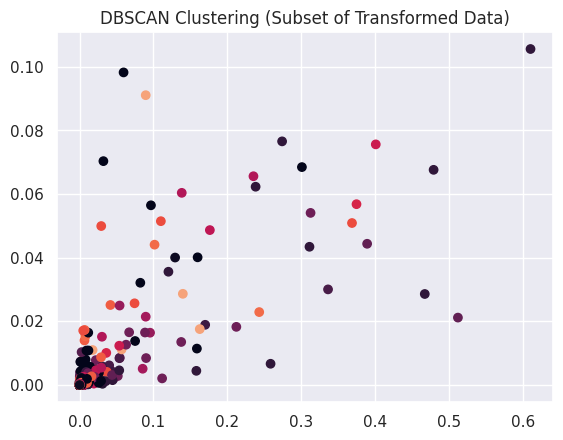

In [45]:
from sklearn.cluster import DBSCAN

subset_size = 1000  # Choose the size of the subset
subset_data = transformed_data[:subset_size]

# Perform DBSCAN clustering on the subset
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(subset_data)

# Scatter plot the clustered subset data
plt.scatter(subset_data[:, 0], subset_data[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering (Subset of Transformed Data)')
plt.show()

##### Hierarchical Clustering

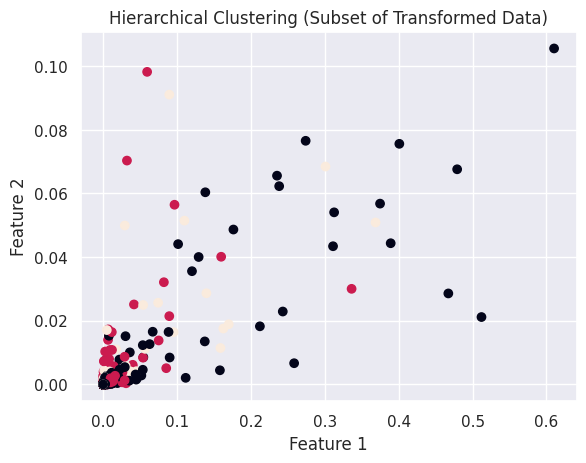

In [46]:
from sklearn.cluster import AgglomerativeClustering

subset_size = 1000
subset_data = transformed_data[:subset_size]

# Perform hierarchical clustering
agglomerative = AgglomerativeClustering(n_clusters=3)

# Fit the hierarchical clustering model and obtain cluster labels
agglomerative_labels = agglomerative.fit_predict(subset_data)

# Scatter plot the clustered subset data
plt.scatter(subset_data[:, 0], subset_data[:, 1], c=agglomerative_labels)
plt.title('Hierarchical Clustering (Subset of Transformed Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()